In [10]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt
import pickle

from DatasetManagerLibs import DatasetConvertor, DatasetReader

In [11]:
lenWindow = 10
upsampleK = 10

datasetReader = DatasetReader("Dataset")
datasetConverter = DatasetConvertor()
for taskName in ["Task0", "Task1", "Task2"]:
    datasetReader.readRawDataset(taskName)
    datasetConverter.registerDataUnit(datasetReader.dfLibrary[taskName])
    datasetConverter.generateTrafficByDpdr(dbParameter=0.01, alpha=0.01, mode="fixed", direction="backward", upsampleK=upsampleK)
    for fingerName in ["thumb_bk"]:
        dataUnit = datasetConverter.getDataUnit(fingerName)
        traffics = dataUnit.generateTrafficPattern(lenWindow=lenWindow)
        print(f"Task: {taskName}, Finger: {fingerName}, Traffic shape: {traffics.shape}, Ts: {dataUnit.Ts}")
        trafficData = {
            'traffic': traffics,
            'Ts': dataUnit.Ts
        }
        with open(f'Results/TrafficData/trafficData_{taskName}_{fingerName}_LenWindow{lenWindow}.pkl', 'wb') as f:
            pickle.dump(trafficData, f)
    datasetConverter.generateTrafficByDpdr(dbParameter=0.001, alpha=0.01, mode="fixed", direction="forward", upsampleK=upsampleK)
    for fingerName in ["thumb_fr"]:
        dataUnit = datasetConverter.getDataUnit(fingerName)
        traffics = dataUnit.generateTrafficPattern(lenWindow=lenWindow)
        print(f"Task: {taskName}, Finger: {fingerName}, Traffic shape: {traffics.shape}, Ts: {dataUnit.Ts}")
        trafficData = {
            'traffic': traffics,
            'Ts': dataUnit.Ts
        }
        with open(f'Results/TrafficData/trafficData_{taskName}_{fingerName}_LenWindow{lenWindow}.pkl', 'wb') as f:
            pickle.dump(trafficData, f)

========== thumb ============
Backward: Compression rate:0.39733459670118215
========== index ============
Backward: Compression rate:0.3796528550707237
========== middle ============
Backward: Compression rate:0.3892579120034007
Task: Task0, Finger: thumb_bk, Traffic shape: (30817,), Ts: 0.001
========== thumb ============
Forward: Compression rate:0.28565634014881347
========== index ============
Forward: Compression rate:0.30863384289891
========== middle ============
Forward: Compression rate:0.3122811685719941
Task: Task0, Finger: thumb_fr, Traffic shape: (30817,), Ts: 0.001
========== thumb ============
Backward: Compression rate:0.39379905655924546
========== index ============
Backward: Compression rate:0.34976441745726333
========== middle ============
Backward: Compression rate:0.35431225723336973
Task: Task1, Finger: thumb_bk, Traffic shape: (36017,), Ts: 0.001
========== thumb ============
Forward: Compression rate:0.25663643102859474
========== index ============
Forward: 

(36017,)
0.001


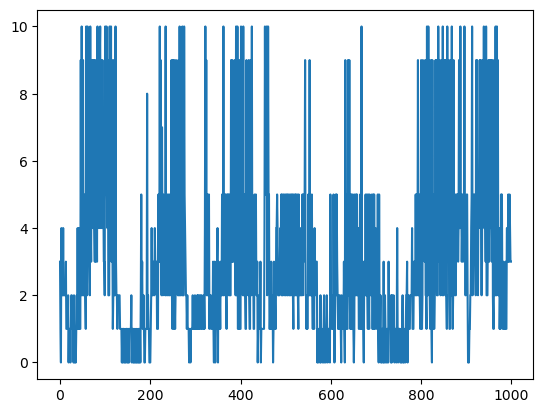

In [16]:
lenWindow = 10
upsampleK = 10
taskName = "Task1"
type = "thumb_fr"

with open(f'Results/TrafficData/trafficData_{taskName}_{type}_LenWindow{lenWindow}.pkl', 'rb') as f:
    trafficData = pickle.load(f)

print(trafficData['traffic'].shape)
print(trafficData['Ts'])

plt.plot(trafficData['traffic'][0:1000])
plt.show()